# EDA: Violencia Domestica

Este tutorial presenta un análisis exploratorio de datos (EDA) sobre un conjunto de información relacionado con la violencia doméstica, utilizando Python y librerías como pandas, matplotlib y seaborn. Se describen las variables del dataset (edad, educación, empleo, ingresos, estado civil y presencia de violencia), y se aplican análisis univariados mediante estadísticas descriptivas y gráficos de distribución para comprender el comportamiento de los datos numéricos y categóricos. El objetivo es identificar patrones y características generales del fenómeno analizado. 

# Descripción General del Dataset

Variables disponibles:

SL. No: Identificador único

Age: Edad de la persona

Education: Nivel educativo (none, primary, secondary, tertiary)

Employment: Situación laboral (unemployed, semi employed, employed)

Income: Ingresos mensuales

Marital status: Estado civil (married, unmarred)

Violence: Presencia de violencia doméstica (yes, no)

In [9]:

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Carga del archivo CSV
df = pd.read_csv('C:/Users/laura/Downloads/Domestic violence.csv')

# Eliminar espacios en los nombres de columnas
df.columns = df.columns.str.strip()

# Mostrar las primeras filas
print(df.head())  



   SL. No  Age  Education  Employment  Income Marital status Violence
0       1   30  secondary  unemployed       0        married      yes
1       2   47   tertiary  unemployed       0        married       no
2       3   24   tertiary  unemployed       0       unmarred       no
3       4   22   tertiary  unemployed       0       unmarred       no
4       5   50    primary  unemployed       0        married      yes


In [10]:
print(df.columns) 

Index(['SL. No', 'Age', 'Education', 'Employment', 'Income', 'Marital status',
       'Violence'],
      dtype='object')


# Analisis Univariado 

## Estadisticas descriptivas 

In [11]:
print("\nEstadísticas Descriptivas de Variables Numéricas (Age, Income)")
print(df[['Age', 'Income']].describe())


Estadísticas Descriptivas de Variables Numéricas (Age, Income)
              Age        Income
count  347.000000    347.000000
mean    31.380403   2110.685879
std      9.601569   5743.278766
min     15.000000      0.000000
25%     23.000000      0.000000
50%     30.000000      0.000000
75%     39.500000      0.000000
max     60.000000  35000.000000


## Distribución de la Edad (Gráfica)

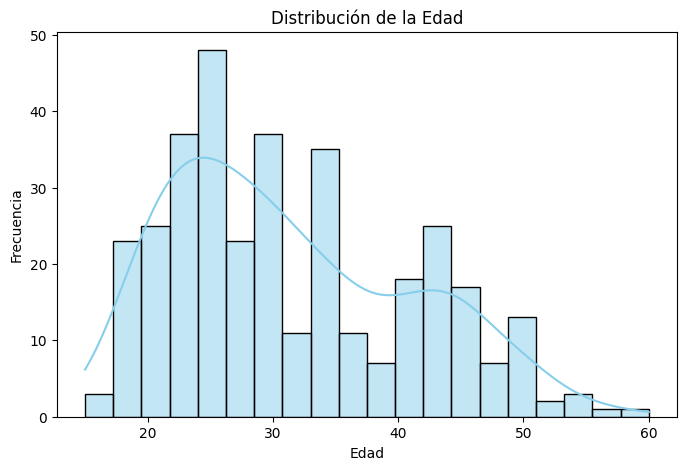

In [12]:
plt.figure(figsize=(8, 5))
sns.histplot(df['Age'], kde=True, bins=20, color='skyblue')
plt.title('Distribución de la Edad')
plt.xlabel('Edad')
plt.ylabel('Frecuencia')
plt.show()

## Distribución de Ingresos (Gráfica)

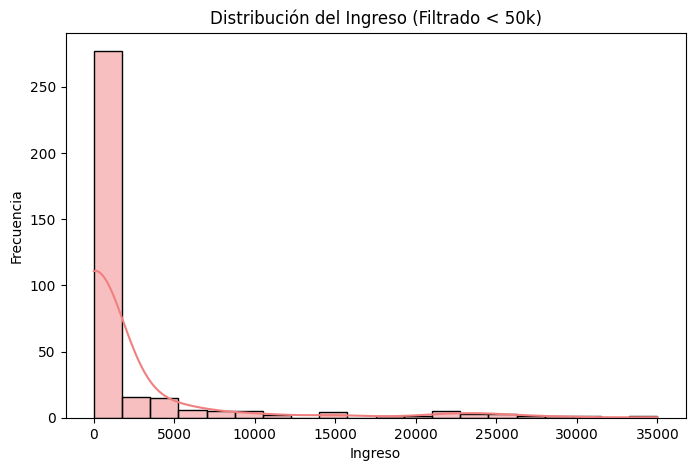

In [13]:
plt.figure(figsize=(8, 5))
sns.histplot(df[df['Income'] < 50000]['Income'], kde=True, bins=20, color='lightcoral')
plt.title('Distribución del Ingreso (Filtrado < 50k)')
plt.xlabel('Ingreso')
plt.ylabel('Frecuencia')
plt.show()

## Distribución de violencia doméstica (Variable objetivo)

In [14]:
violence_table = df['Violence'].value_counts().to_frame().reset_index()
violence_table.columns = ['Violencia', 'Frecuencia']
violence_table['Porcentaje (%)'] = (df['Violence'].value_counts(normalize=True).mul(100).round(2).values)
display(violence_table)


,Violencia,Frecuencia,Porcentaje (%)
0,no,261,75.22
1,yes,86,24.78


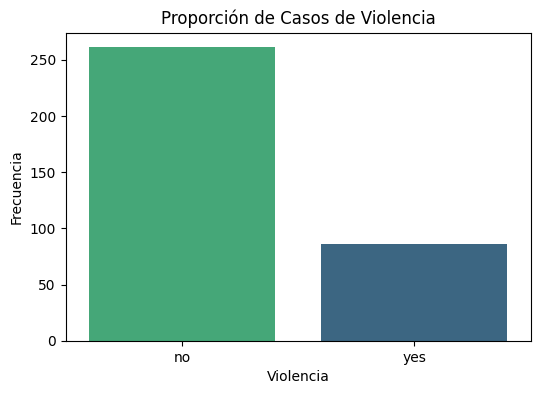

In [15]:
# Distribución de violencia doméstoca (Gráfica)

plt.figure(figsize=(6,4))
sns.countplot(x='Violence', data=df, order=df['Violence'].value_counts().index, hue='Violence', legend=False, palette='viridis')
plt.title('Proporción de Casos de Violencia')
plt.xlabel('Violencia')
plt.ylabel('Frecuencia')
plt.show()

## Distribución educación 

In [16]:
education_table = df['Education'].value_counts().to_frame().reset_index()
education_table.columns = ['Nivel educativo', 'Frecuencia']
education_table['Porcentaje (%)'] = (df['Education'].value_counts(normalize=True).mul(100).round(2).values)
display(education_table)

,Nivel educativo,Frecuencia,Porcentaje (%)
0,primary,132,38.04
1,secondary,114,32.85
2,none,52,14.99
3,tertiary,49,14.12


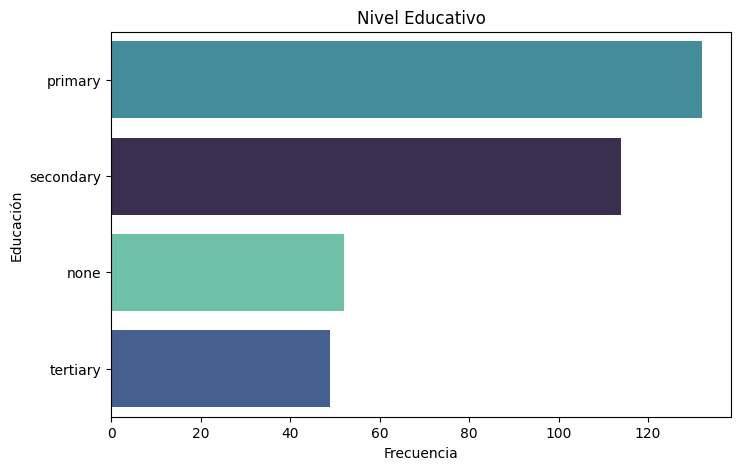

In [17]:
# Distribución nivel Educativo (Gráfica)

plt.figure(figsize=(8,5))
sns.countplot(y='Education', data=df, order=df['Education'].value_counts().index, hue='Education', legend=False, palette='mako')
plt.title('Nivel Educativo')
plt.xlabel('Frecuencia')
plt.ylabel('Educación')
plt.show()

## Situación laboral 

In [18]:
df['Employment'] = df['Employment'].str.strip().str.lower()

employment_table = df['Employment'].value_counts().to_frame().reset_index()
employment_table.columns = ['Situación laboral', 'Frecuencia']
employment_table['Porcentaje (%)'] = (df['Employment'].value_counts(normalize=True).mul(100).round(2).values)
display(employment_table)


,Situación laboral,Frecuencia,Porcentaje (%)
0,unemployed,274,78.96
1,semi employed,47,13.54
2,employed,26,7.49


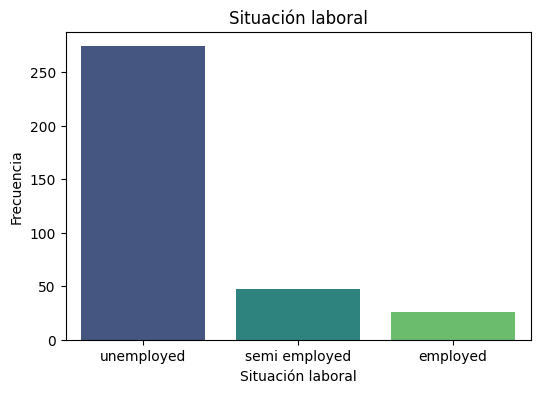

In [19]:
# Situación laboral (Gráfica)

plt.figure(figsize=(6,4))
sns.countplot(x='Employment', data=df, order=df['Employment'].value_counts().index, hue='Employment', legend=False, palette='viridis')
plt.title('Situación laboral')
plt.xlabel('Situación laboral')
plt.ylabel('Frecuencia')
plt.show()

## Estado civil

In [20]:
status_table = df['Marital status'].value_counts().to_frame().reset_index()
status_table.columns = ['Estado civil', 'Frecuencia']
status_table['Porcentaje (%)'] = (df['Marital status'].value_counts(normalize=True).mul(100).round(2).values)
display(status_table)

,Estado civil,Frecuencia,Porcentaje (%)
0,married,300,86.46
1,unmarred,47,13.54


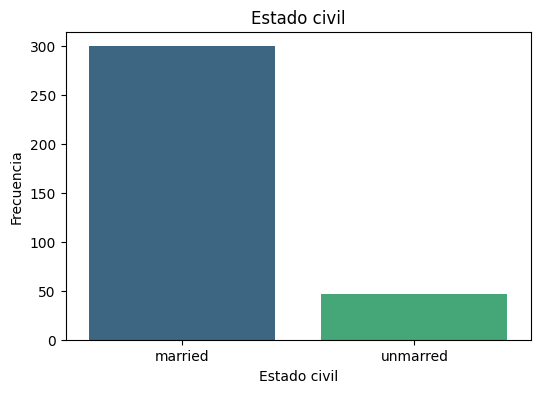

In [21]:
# Estado civil (Gráfica)

plt.figure(figsize=(6,4))
sns.countplot(x='Marital status', data=df, order=df['Marital status'].value_counts().index, hue='Marital status', legend=False, palette='viridis')
plt.title('Estado civil')
plt.xlabel('Estado civil')
plt.ylabel('Frecuencia')
plt.show()


# Análisis Bivariado y Multivariado

## Educación VS Violencia 

,Education,Violence,Violence Count,Total violencia por educación,Porcentaje por educación
0,none,no,41,52,78.85
1,none,yes,11,52,21.15
2,primary,no,86,132,65.15
3,primary,yes,46,132,34.85
4,secondary,no,94,114,82.46
5,secondary,yes,20,114,17.54
6,tertiary,no,40,49,81.63
7,tertiary,yes,9,49,18.37


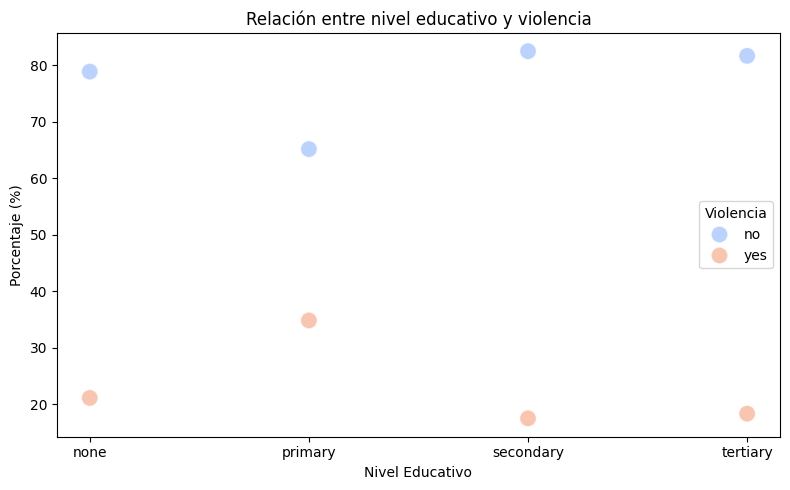


Tabla Cruzada: Violencia vs. Educación
Violence      no    yes
Education              
none       78.85  21.15
primary    65.15  34.85
secondary  82.46  17.54
tertiary   81.63  18.37


In [22]:
query1 = df.groupby('Education')['Violence'].value_counts()
query_yes_df = query1.reset_index(name='Count')
query_yes_df = query_yes_df.rename(columns={'Count': 'Violence Count'})
query_yes_df['Total violencia por educación'] = query_yes_df.groupby('Education')['Violence Count'].transform('sum')
query_yes_df['Porcentaje por educación'] = (query_yes_df['Violence Count'] * 100 / query_yes_df['Total violencia por educación']).round(2)
display(query_yes_df)

plt.figure(figsize=(8,5))
sns.scatterplot(data=query_yes_df,
    x='Education',
    y='Porcentaje por educación',
    hue='Violence',
    s=150,  
    alpha=0.8,
    palette='coolwarm')

plt.title('Relación entre nivel educativo y violencia')
plt.xlabel('Nivel Educativo')
plt.ylabel('Porcentaje (%)')
plt.legend(title='Violencia')
plt.tight_layout()
plt.show()

# Tabla cruzada
print("\nTabla Cruzada: Violencia vs. Educación")
cross_education_violence = pd.crosstab(df['Education'], df['Violence'], normalize='index') * 100
print(cross_education_violence.round(2))

## Estado civil VS Violencia

,Marital status,Violence,Violence Count,Total violencia por estado civil,Porcentaje por estado civil
0,married,no,217,300,72.33
1,married,yes,83,300,27.67
2,unmarred,no,44,47,93.62
3,unmarred,yes,3,47,6.38


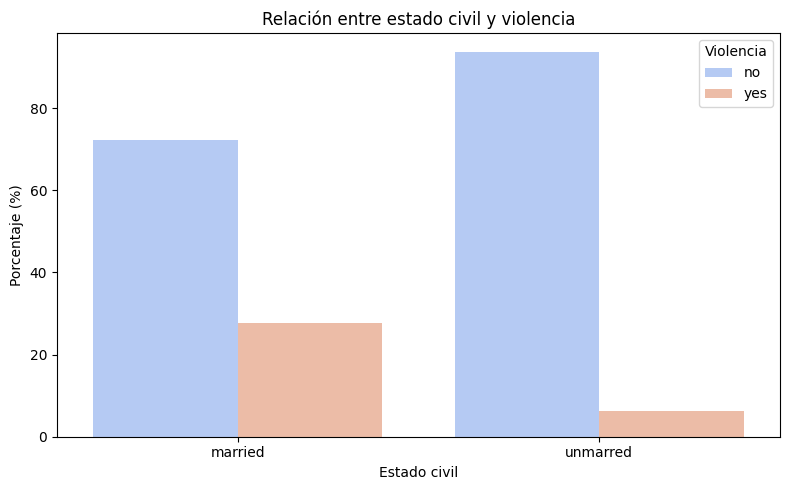


Tabla Cruzada: Violencia vs. Estado Civil
Violence           no    yes
Marital status              
married         72.33  27.67
unmarred        93.62   6.38


In [23]:
query1 = df.groupby('Marital status')['Violence'].value_counts()
query_yes_df = query1.reset_index(name='Count')
query_yes_df = query_yes_df.rename(columns={'Count': 'Violence Count'})
query_yes_df['Total violencia por estado civil'] = query_yes_df.groupby('Marital status')['Violence Count'].transform('sum')
query_yes_df['Porcentaje por estado civil'] = (
    query_yes_df['Violence Count'] * 100 / query_yes_df['Total violencia por estado civil']).round(2)
display(query_yes_df)

plt.figure(figsize=(8,5))
sns.barplot(data=query_yes_df,
    x='Marital status',
    y='Porcentaje por estado civil',
    hue='Violence',
    palette='coolwarm')

plt.title('Relación entre estado civil y violencia')
plt.xlabel('Estado civil')
plt.ylabel('Porcentaje (%)')
plt.legend(title='Violencia')
plt.tight_layout()
plt.show()

# Tabla cruzada 
print("\nTabla Cruzada: Violencia vs. Estado Civil")
cross_marital_violence = pd.crosstab(df['Marital status'], df['Violence'], normalize='index') * 100
print(cross_marital_violence.round(2))

## Situación laboral VS Violencia

,Employment,Violence,Violence Count,Total violencia por empleo,Porcentaje por empleo
0,employed,no,20,26,76.92
1,employed,yes,6,26,23.08
2,semi employed,no,42,47,89.36
3,semi employed,yes,5,47,10.64
4,unemployed,no,199,274,72.63
5,unemployed,yes,75,274,27.37


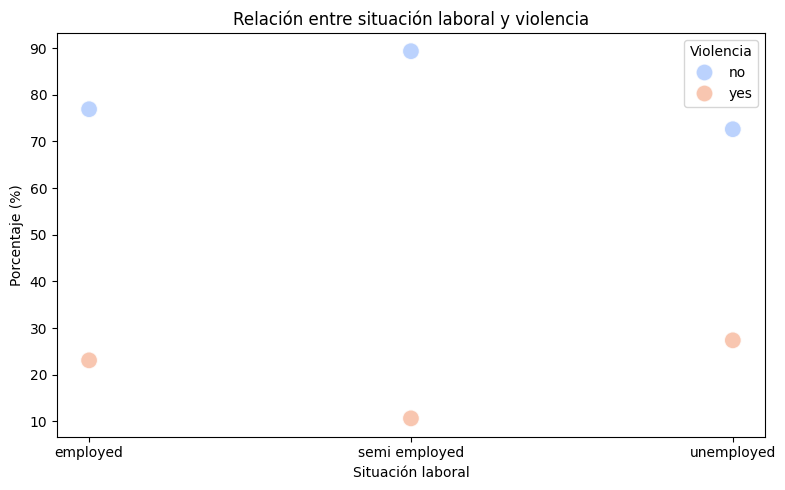


Tabla Cruzada: Violencia vs. Situación Laboral
Violence          no    yes
Employment                 
employed       76.92  23.08
semi employed  89.36  10.64
unemployed     72.63  27.37


In [24]:
query1 = df.groupby('Employment')['Violence'].value_counts()
query_yes_df = query1.reset_index(name='Count')
query_yes_df = query_yes_df.rename(columns={'Count': 'Violence Count'})
query_yes_df['Total violencia por empleo'] = query_yes_df.groupby('Employment')['Violence Count'].transform('sum')
query_yes_df['Porcentaje por empleo'] = (
    query_yes_df['Violence Count'] * 100 / query_yes_df['Total violencia por empleo']).round(2)
display(query_yes_df)

plt.figure(figsize=(8,5))
sns.scatterplot(data=query_yes_df,
    x='Employment',
    y='Porcentaje por empleo',
    hue='Violence',
    s=150,  
    alpha=0.8,
    palette='coolwarm')

plt.title('Relación entre situación laboral y violencia')
plt.xlabel('Situación laboral')
plt.ylabel('Porcentaje (%)')
plt.legend(title='Violencia')
plt.tight_layout()
plt.show()

# Tabla cruzada
print("\nTabla Cruzada: Violencia vs. Situación Laboral")
cross_employment_violence = pd.crosstab(df['Employment'], df['Violence'], normalize='index') * 100
print(cross_employment_violence.round(2))

# Hallazgos 

1. Se observa una distribución desigual de los casos de violencia doméstica entre los diferentes grupos analizados, lo que sugiere que factores sociodemográficos como la educación, el empleo y el estado civil pueden influir significativamente en su incidencia.

2. El nivel educativo muestra una relación clara con la violencia doméstica, los individuos con niveles educativos bajos presentan una mayor proporción de casos de violencia, mientras que los niveles de violencia disminuyen en los grupos con educación media o superior.

3. La situación laboral evidencia una tendencia importante, las personas desempleadas concentran una mayor proporción de casos de violencia, lo que sugiere una posible relación entre la falta de empleo y el aumento de la vulnerabilidad ante situaciones de violencia.

4. El estado civil presenta diferencias significativas, las personas casadas o en unión tienden a registrar más casos de violencia en comparación con las solteras o separadas, posiblemente debido a factores relacionados con la convivencia y las dinámicas familiares.

5. Las variables sociodemográficas analizadas evidencian que la violencia doméstica no depende de un solo factor, sino que está vinculada a condiciones estructurales y contextuales como el nivel educativo, la estabilidad laboral y la composición familiar.